Первые 5 значений из столбца 'APC': [18523 18487 18470 18450 18433]


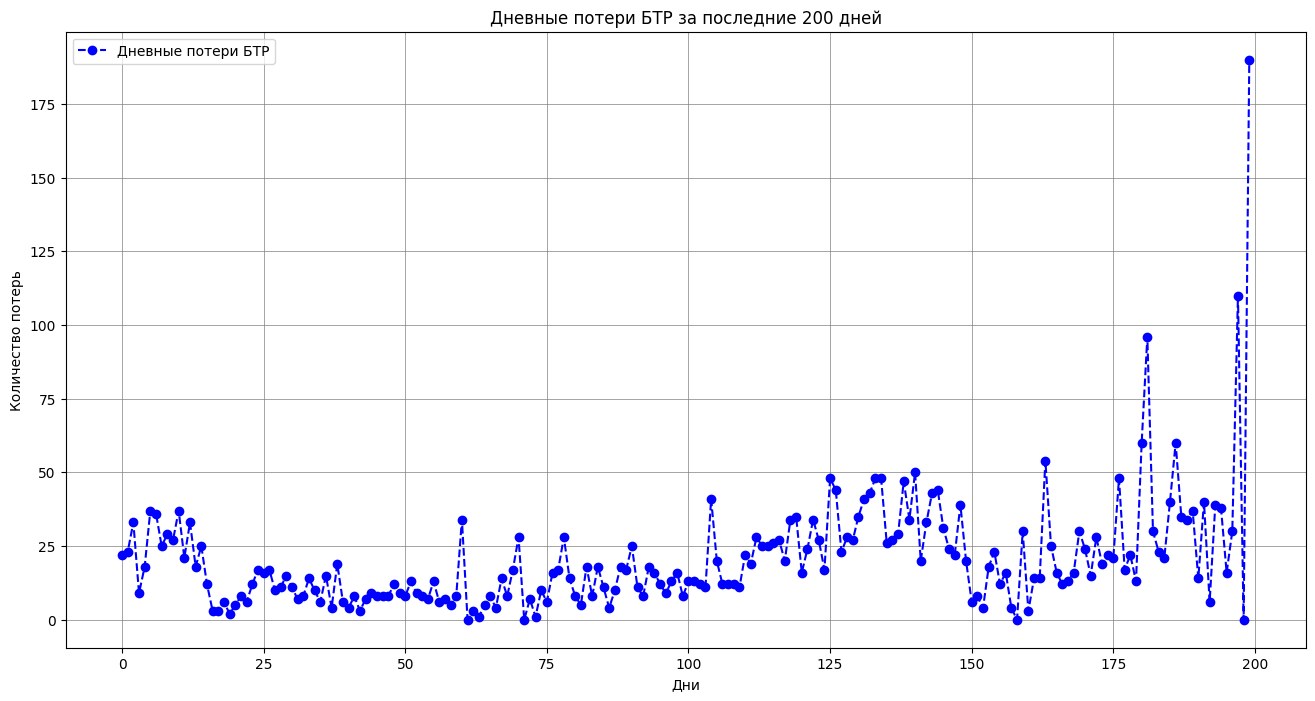

Все дневные потери: [ 36  17  20  17  29   9  40  23  45  33  25  30  24  64  39  19  51  33
  30  44  19  49  27  35  14  11  30  31  21  31  31  17  32  44  27  38
  42  52  40  12  40  30  52  38  39  13   3   6   8  20  40  48  17  13
  19   9  19   0   9  21  27  35  26  24  14  23  18  14  19  17  11  21
  32  25  21  26  15   7  12  35  24  17  17   5  13   9   9   9  29   8
  31  17  27   8  42  20  38   8  21  24  11  26  13  20  17  46  15  19
  12   9  36  15  32  24  23  17  11  19  40  16  18  11  17  17  16  26
  19  25  21   9  19  18  15  15  11  35  18  12  20  18   6  29  26  21
  11  32  13  26   9  20  40  16  18  22  33  12  22  22  33  40  15  17
  11  27  27  22  34  35  35  43  14  30  48  43  42  22  40  32  35  19
  14  34  23  27  33  29  21  39  16  20  14  15  14  12  12   8  23  21
  17   8  18  13  31  20  47  19  12  47  45  24  54  38  73  18  18  29
  17  20  20  27  21   9  24  25  28  19  37  16   9  35  17  24  24  11
  17  20  27  24  27  25  19  5

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Функция для чтения данных из указанного столбца
def read_column(filename, column_name):
    with open(filename, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        header = next(reader)  # Пропуск заголовка
        column_index = header.index(column_name)
        
        data = []
        for row in reader:
            value = row[column_index]
            if value.isdigit():
                data.append(int(value))
            else:
                data.append(0)  # Или какая-то другая логика для обработки некорректных данных
        return np.array(data)

# Чтение данных из столбца 'APC'
filename = 'russia_losses_equipment.csv'
apc_data = read_column(filename, 'APC')
print("Первые 5 значений из столбца 'APC':", apc_data[:5])

# Перерасчет данных для получения правильных значений дневных потерь
daily_losses = np.diff(apc_data) * -1  # Инвертируем разности, чтобы получить положительные значения потерь

# Повторная проверка расчета 5 крупнейших дневных потерь
largest_daily_losses = np.sort(daily_losses)[-5:]

# Функция для подсчета потерь летом 2023 года
def summer_2023_daily_losses(filename, column_name, date_column='date'):
    with open(filename, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        header = next(reader)
        date_index = header.index(date_column)
        column_index = header.index(column_name)
        
        dates = []
        cumulative_losses = []

        for row in reader:
            date = datetime.datetime.strptime(row[date_index], '%Y-%m-%d')
            if row[column_index].isdigit():
                dates.append(date)
                cumulative_losses.append(int(row[column_index]))
        
        # Преобразование в массивы numpy
        dates = np.array(dates)
        cumulative_losses = np.array(cumulative_losses)
        
        # Выбор данных за лето 2023 года
        summer_start = datetime.datetime(2023, 6, 1)
        summer_end = datetime.datetime(2023, 8, 31)
        summer_mask = (dates >= summer_start) & (dates <= summer_end)
        
        # Вычисление дневных потерь за лето 2023
        summer_daily_losses = np.diff(cumulative_losses[summer_mask]) * -1  # Инвертируем разности
        return np.sum(summer_daily_losses)

summer_2023_total_losses = summer_2023_daily_losses(filename, 'APC')

# Пересчет среднего значения потерь за 100-500 дней
mean_100_500_days = np.mean(daily_losses[99:500]) if len(daily_losses) > 500 else np.nan

# 5. Построение графика потерь за последние 200 дней
plt.figure(figsize=(16, 8), dpi=100)
plt.plot(daily_losses[-200:], linestyle='--', marker='o', color='b', label='Дневные потери БТР')
plt.title('Дневные потери БТР за последние 200 дней')
plt.xlabel('Дни')
plt.ylabel('Количество потерь')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.legend()
plt.savefig('daily_apc_losses_last_200_days.png')  # Сохранение графика в файл
plt.show()

# Преобразуем результаты в обычные типы данных
largest_daily_losses_list = largest_daily_losses.tolist()
summer_2023_total_losses = int(summer_2023_total_losses)  # Преобразуем в целое число
mean_100_500_days = float(mean_100_500_days)  # Преобразуем в число с плавающей точкой

# Выводим результат в удобочитаемом виде
print("Все дневные потери:", daily_losses)  # Вывод всех дневных потерь
print("5 крупнейших дневных потерь:", largest_daily_losses_list)
print("Общий ущерб за лето 2023 года:", summer_2023_total_losses)
print("Среднее значение потерь за 100-500 дней:", mean_100_500_days)


In [1]:
N = ord("D") % 3 + 1,
print(N)

(3,)
